In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [6]:
df=pd.read_csv("/content/healthcare-dataset-stroke-data (1).csv")

# EDA

In [7]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
df.shape

(5110, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [10]:
# Number of records where individual's income is more than $50,000
n_stroke = df[df['stroke' ] == 1].shape[0]

# Number of records where individual's income is at most $50,000
n_nostroke = df[df['stroke'] == 0].shape[0]

# Percentage of individuals whose income is more than $50,000
greater_percent =  (n_nostroke /5110 ) * 100

print("Stroke: {}".format(n_stroke))
print("No Stroke: {}".format(n_nostroke))
print("Percentage of no stroke {:.2f}%".format(greater_percent))

Stroke: 249
No Stroke: 4861
Percentage of no stroke 95.13%


### This indicates That our data is unbalanced

In [11]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Checking for nulls

In [12]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

#### Bmi has nulls.

### Checking for outliers

<Axes: >

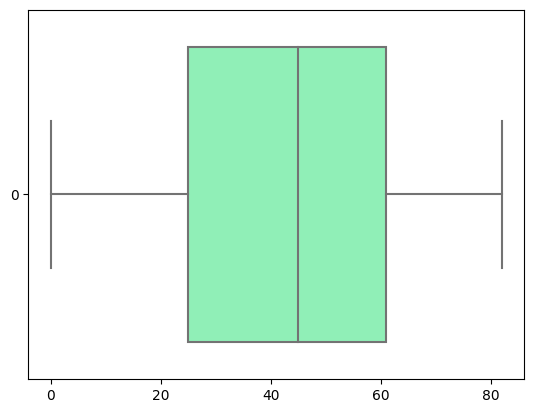

In [13]:
sns.boxplot(data=df['age'],palette='rainbow',orient='h')

<Axes: >

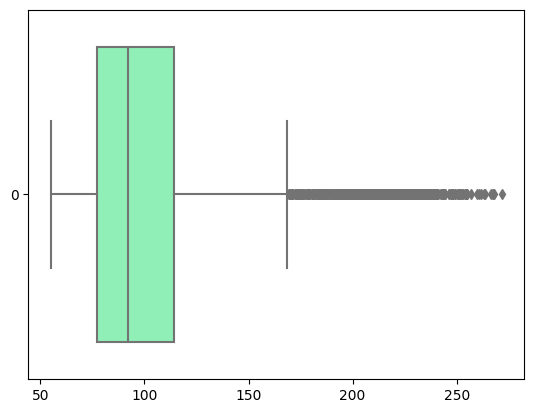

In [14]:
sns.boxplot(data=df['avg_glucose_level'],palette='rainbow',orient='h')

<Axes: >

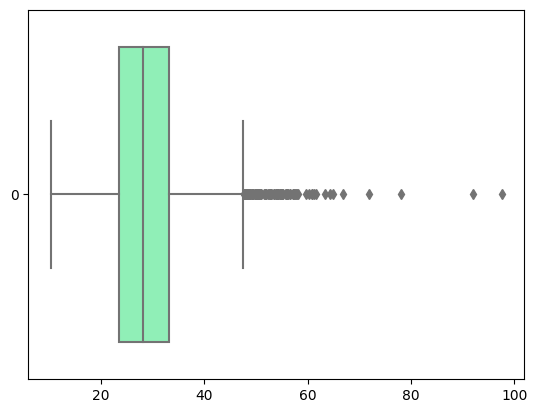

In [15]:
sns.boxplot(data=df['bmi'],palette='rainbow',orient='h')

#### We conclude that bmi and avg_glucose_level have a lot of outliers.

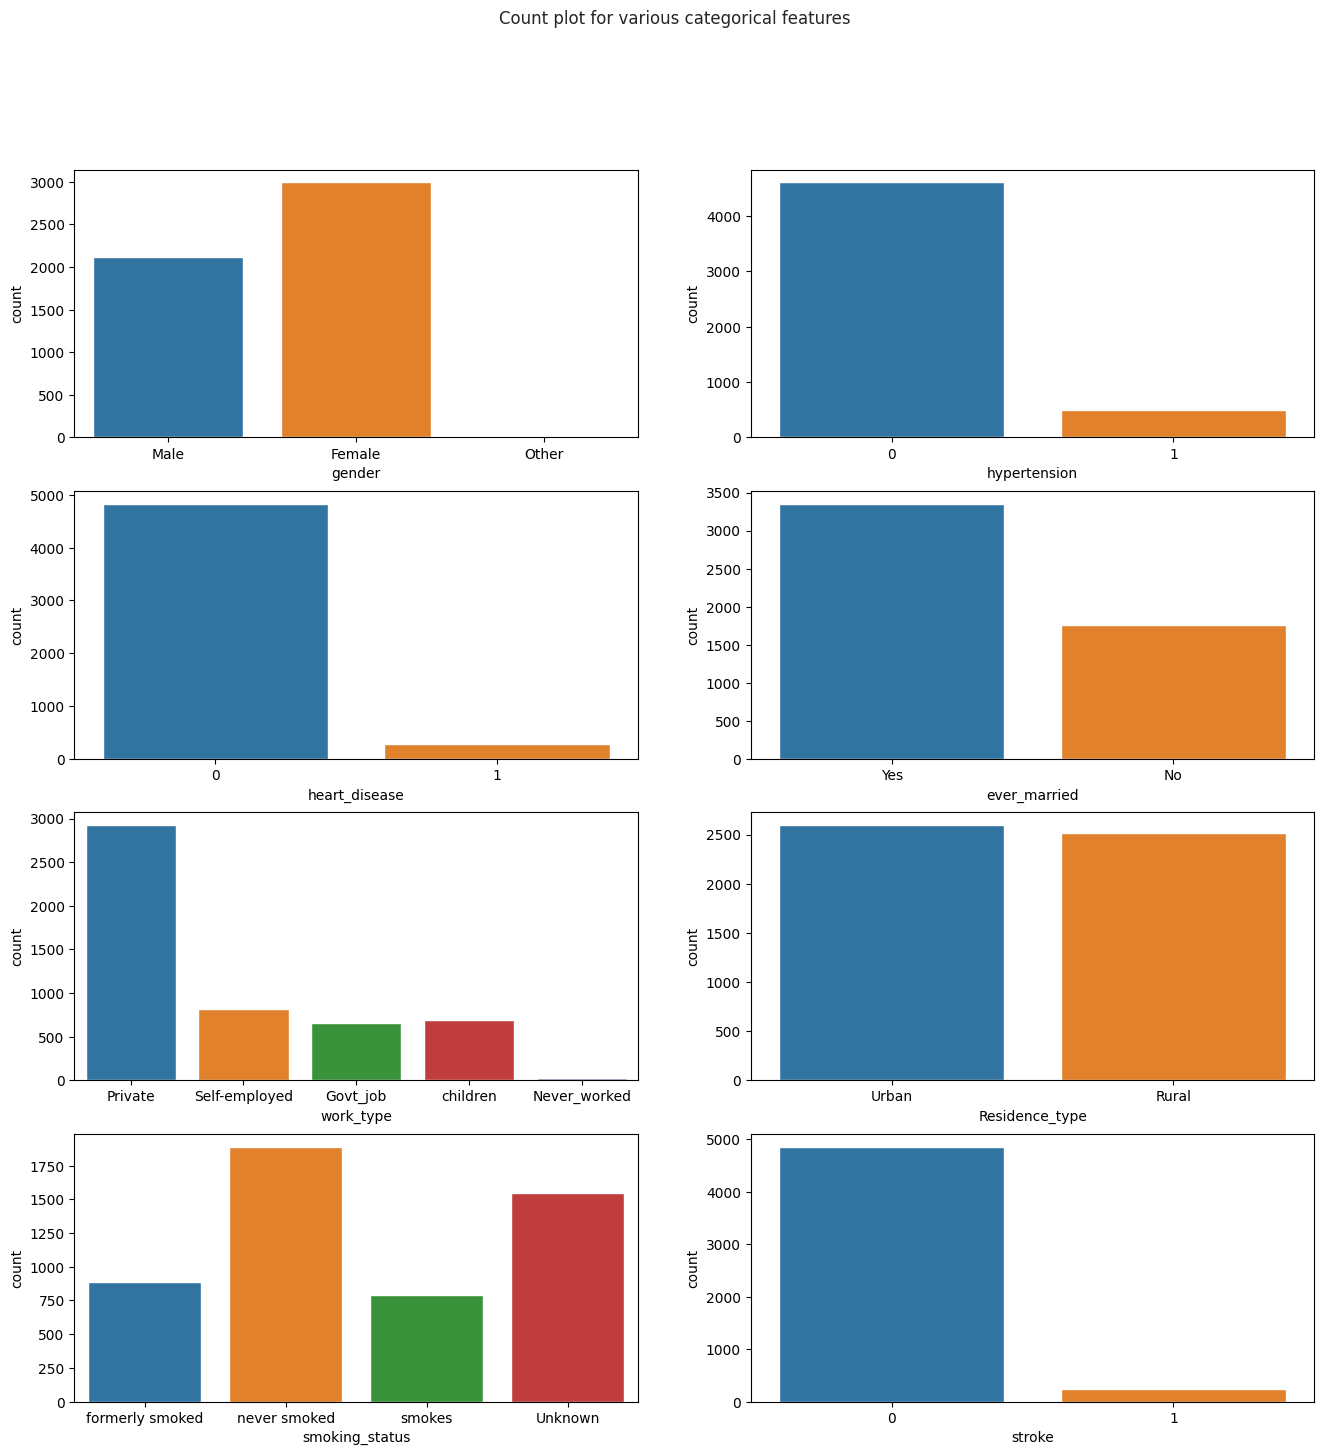

In [16]:
fig,axes = plt.subplots(4,2,figsize = (16,16))
sns.set_style('whitegrid')
fig.suptitle("Count plot for various categorical features")

sns.countplot(ax=axes[0,0],data=df,x='gender')
sns.countplot(ax=axes[0,1],data=df,x='hypertension')
sns.countplot(ax=axes[1,0],data=df,x='heart_disease')
sns.countplot(ax=axes[1,1],data=df,x='ever_married')
sns.countplot(ax=axes[2,0],data=df,x='work_type')
sns.countplot(ax=axes[2,1],data=df,x='Residence_type')
sns.countplot(ax=axes[3,0],data=df,x='smoking_status')
sns.countplot(ax=axes[3,1],data=df,x='stroke')

plt.show()

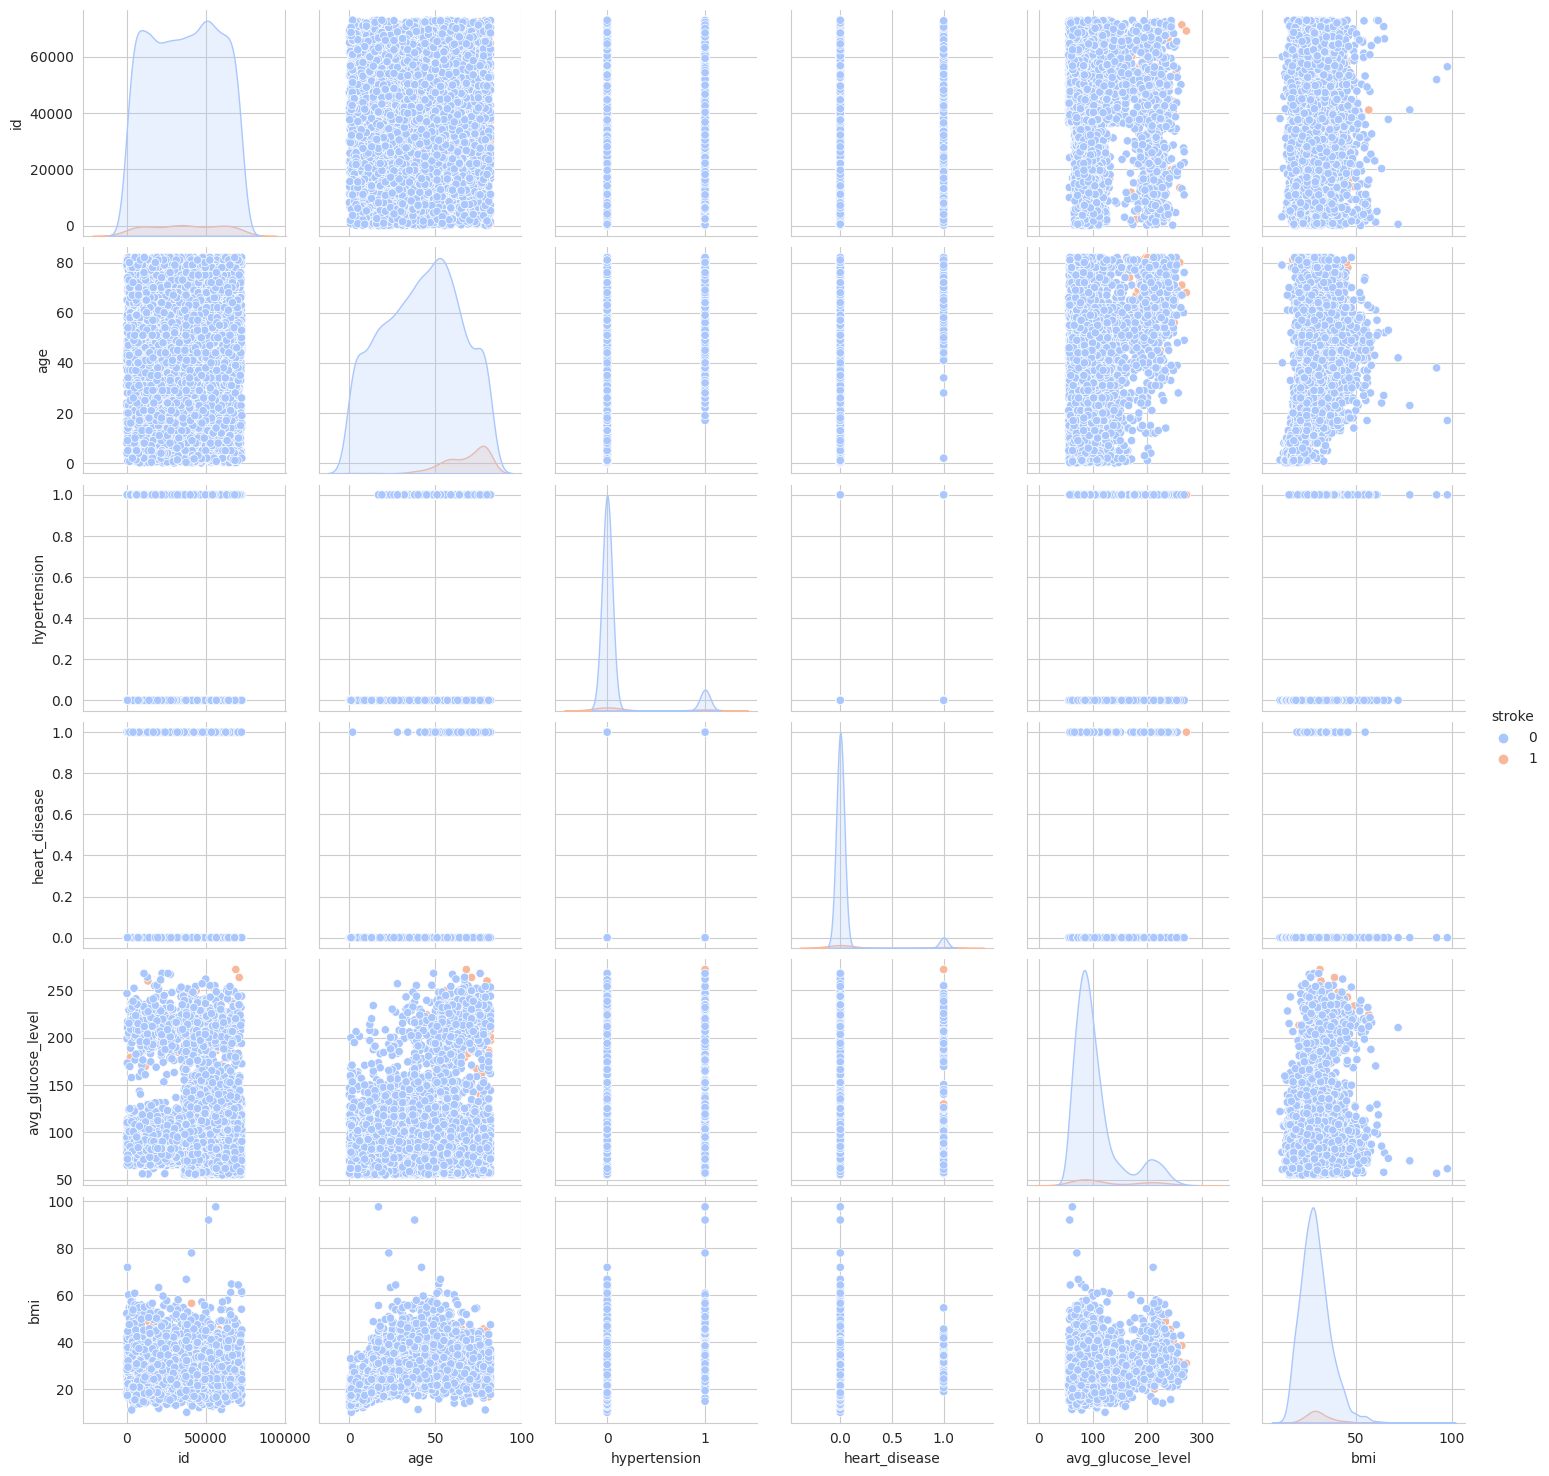

In [17]:
sns.pairplot(df,hue='stroke',palette='coolwarm')

### Conclusion:

1- Females are more than males the data is unbalanced.

2- hypertension , stroke and heart disease is most of time 0 this will affect on our model.

### Problems we have:

1- Handling Nulls and Outliers

2- Encoding Categorical Columns

3- Feature Selection 

4- Making the dataset more balanced because our model will biased to no stroke.




# Data Preprocessing

# Handling String columns:

In [18]:
df['Residence_type']=df['Residence_type'].replace("Urban",1)
df['Residence_type']=df['Residence_type'].replace("Rural",0)

In [19]:
df['smoking_status']=df['smoking_status'].replace("never smoked",1)
df['smoking_status']=df['smoking_status'].replace("formerly smoked",2)
df['smoking_status']=df['smoking_status'].replace("smokes",3)
df['smoking_status']=df['smoking_status'].replace("Unknown",4)

In [20]:
df['work_type']=df['work_type'].replace("Private",1)
df['work_type']=df['work_type'].replace("Self-employed",2)
df['work_type']=df['work_type'].replace("Govt_job",3)
df['work_type']=df['work_type'].replace("children",4)
df['work_type']=df['work_type'].replace("Never_worked",5)

In [21]:
df['ever_married']=df['ever_married'].replace("Yes",1)
df['ever_married']=df['ever_married'].replace("No",0)

In [22]:
df['gender']=df['gender'].replace("Male",1)
df['gender']=df['gender'].replace("Female",0)
df['gender']=df['gender'].replace("Other",0)

In [23]:
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,1,1,228.69,36.6,2,1
1,51676,0,61.0,0,0,1,2,0,202.21,NaN,1,1
2,31112,1,80.0,0,1,1,1,0,105.92,32.5,1,1
3,60182,0,49.0,0,0,1,1,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,2,0,174.12,24.0,1,1


#### All data is numerical now 


In [24]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [25]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [26]:
df['gender'].value_counts()

0    2995
1    2115
Name: gender, dtype: int64

# Handling nulls and Outliers

In [30]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [31]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [32]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [33]:
def outliers(dataset,column):
    q1,q3=np.percentile(dataset[column],[25,75])
    iqr=q3-q1
    lower_bound=q1-(1.5*iqr)
    upper_bound=q3+(1.5*iqr)
    for i in dataset[column]:
        if i > q3:
            dataset[column].replace(i,upper_bound,inplace=True)
       

In [34]:
outliers(df,'bmi')

In [35]:
outliers(df,'avg_glucose_level')

<Axes: >

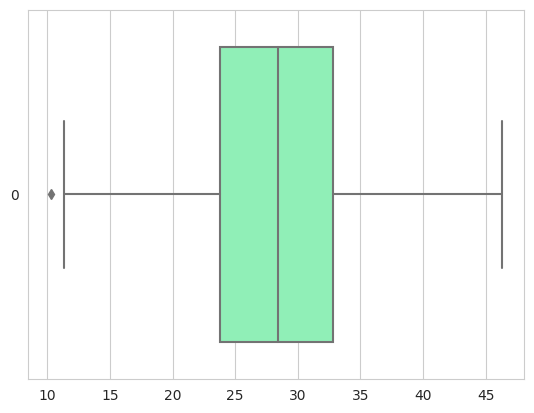

In [36]:
sns.boxplot(data=df['bmi'],palette='rainbow',orient='h')

<Axes: >

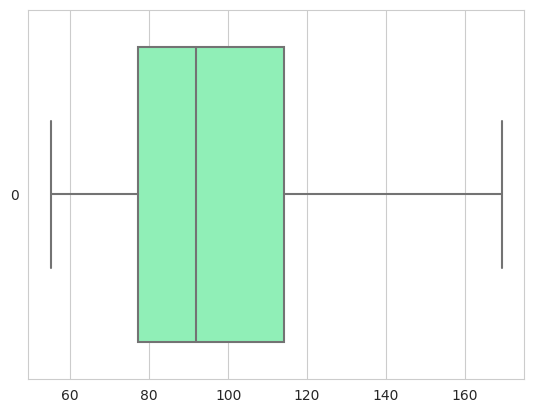

In [37]:
sns.boxplot(data=df['avg_glucose_level'],palette='rainbow',orient='h')

In [38]:
df["avg_glucose_level"].describe()

count    5110.000000
mean      105.697882
std        39.015599
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       169.357500
Name: avg_glucose_level, dtype: float64

In [39]:
df["bmi"].describe()

count    5110.000000
mean       30.672043
std         9.780406
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        46.300000
Name: bmi, dtype: float64

# Splitting data into features and target

In [27]:
X = df.drop(['stroke'],axis=1,inplace=False)

In [28]:
Y = df['stroke']

In [29]:
X.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

# Handling biased data with over_sampling balance

In [40]:
from imblearn.over_sampling import RandomOverSampler 
sm = RandomOverSampler()
X_over_sampled , Y_over_sampled = sm.fit_resample(X , Y )
print("X_balanced shape is " , X_over_sampled.shape )
print("y_balanced shape is " , Y_over_sampled.shape )

X_balanced shape is  (9722, 11)
y_balanced shape is  (9722,)


In [41]:
Y_over_sampled.value_counts()

1    4861
0    4861
Name: stroke, dtype: int64

# Handling biased data with under_sampling balance 

In [42]:
from imblearn.under_sampling import RandomUnderSampler 
sm = RandomUnderSampler()
X_under_sampled , Y_under_sampled = sm.fit_resample(X , Y)
print("X_balanced shape is " , X_under_sampled.shape )
print("y_balanced shape is " , Y_under_sampled.shape )

X_balanced shape is  (498, 11)
y_balanced shape is  (498,)


In [43]:
Y_under_sampled.value_counts()

0    249
1    249
Name: stroke, dtype: int64

# Calculate the correlation of data:


### On Over_sampled data:

In [44]:
data_over_sampled=pd.DataFrame(X_over_sampled)
data_over_sampled["stroke"] = Y_over_sampled

<Axes: >

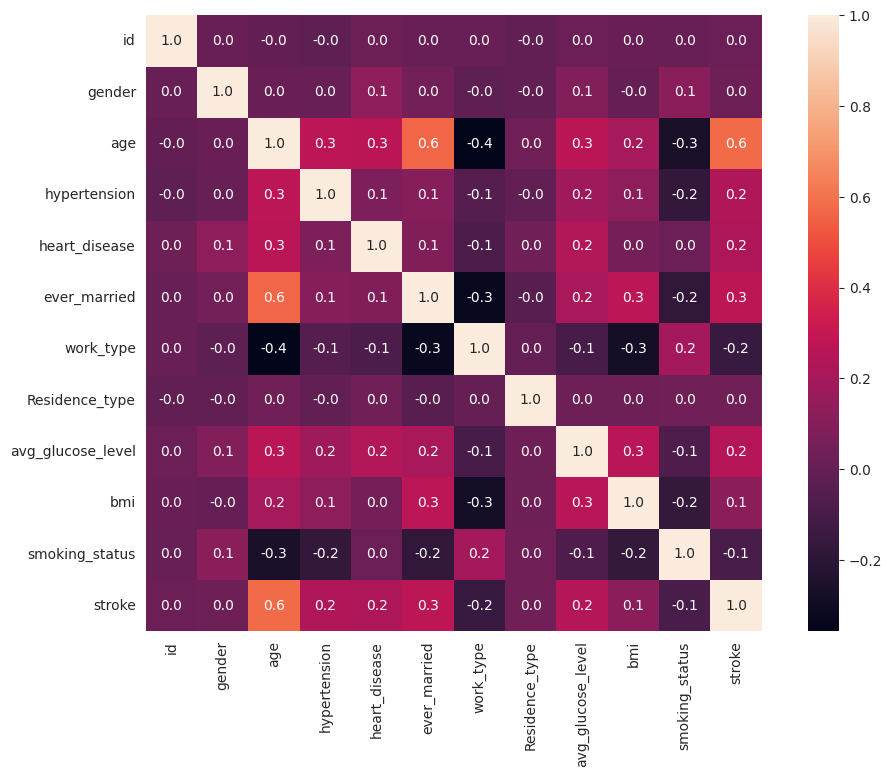

In [45]:
corr = data_over_sampled.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True)

In [46]:
abs(data_over_sampled.corr()["stroke"])

id                   0.014293
gender               0.021649
age                  0.578091
hypertension         0.231600
heart_disease        0.222986
ever_married         0.277522
work_type            0.153274
Residence_type       0.037075
avg_glucose_level    0.249782
bmi                  0.116821
smoking_status       0.092931
stroke               1.000000
Name: stroke, dtype: float64

#### Take features that have correlation with storke more than 0.18


In [47]:
X_over_sampled=X_over_sampled.drop(["smoking_status" , "Residence_type" , "bmi" , "id"], axis=1)

In [48]:
X_over_sampled.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'avg_glucose_level', 'stroke'],
      dtype='object')

### On Under_sampled data:

In [49]:
data_under_sampled=pd.DataFrame(X_under_sampled)
data_under_sampled["stroke"] = Y_under_sampled

<Axes: >

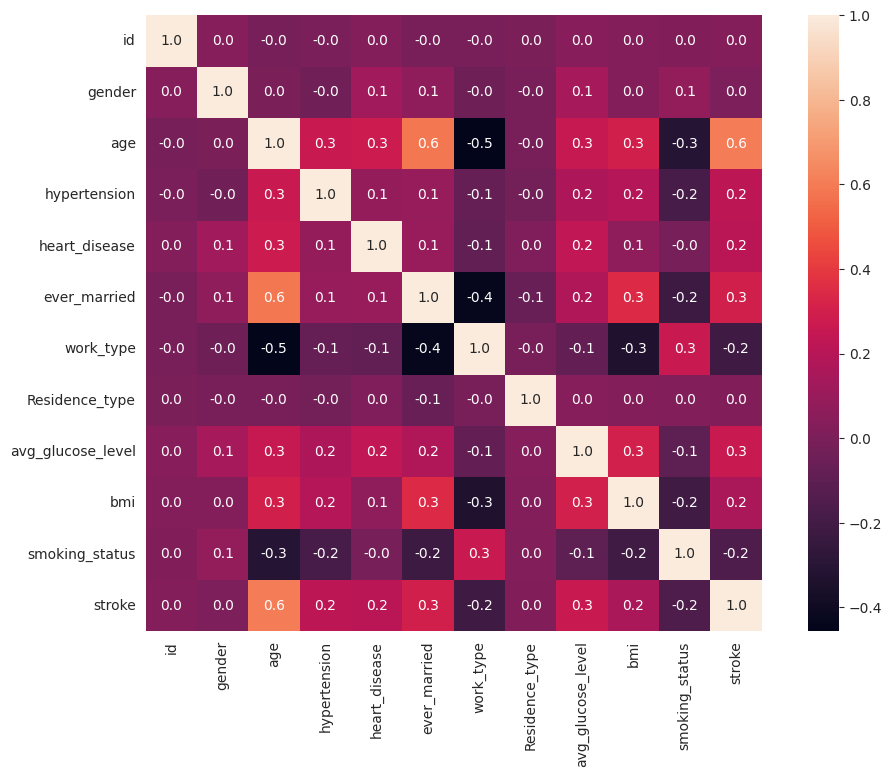

In [50]:
corr = data_under_sampled.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True)

In [51]:
abs(data_under_sampled.corr()["stroke"])

id                   0.030522
gender               0.008113
age                  0.604447
hypertension         0.225378
heart_disease        0.209733
ever_married         0.298818
work_type            0.216189
Residence_type       0.020122
avg_glucose_level    0.265599
bmi                  0.158156
smoking_status       0.159347
stroke               1.000000
Name: stroke, dtype: float64

#### Take features that have correlation with storke more than 0.18

In [52]:
X_under_sampled=X_under_sampled.drop(["smoking_status" , "Residence_type" , "bmi" , "id"], axis=1)

In [53]:
X_under_sampled.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'avg_glucose_level', 'stroke'],
      dtype='object')

# Spliting data into train and test 

### Over_sampled data:

In [54]:
from sklearn.model_selection import train_test_split
X_overS_train , X_overS_test , y_overS_train , y_overS_test = train_test_split(X_over_sampled , Y_over_sampled , test_size=0.30 , random_state= 42 , shuffle = True)
print("X_train shape  is " , X_overS_train.shape )
print("X_test shape is " , X_overS_test.shape )
print("y_train shape is " , y_overS_train.shape )
print("y_test shape is " , y_overS_test.shape )

X_train shape  is  (6805, 8)
X_test shape is  (2917, 8)
y_train shape is  (6805,)
y_test shape is  (2917,)


### Under_sampled Data:

In [55]:
from sklearn.model_selection import train_test_split
X_underS_train , X_underS_test , y_underS_train , y_underS_test = train_test_split(X_under_sampled , Y_under_sampled , test_size=0.30 , random_state= 42 , shuffle = True)
print("X_train shape  is " , X_underS_train.shape )
print("X_test shape is " , X_underS_test.shape )
print("y_train shape is " , y_underS_train.shape )
print("y_test shape is " , y_underS_test.shape )

X_train shape  is  (348, 8)
X_test shape is  (150, 8)
y_train shape is  (348,)
y_test shape is  (150,)


# Models:


## Over_sampled data:

In [56]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.metrics import f1_score, precision_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [57]:
model_Log = LogisticRegression(solver = 'liblinear' , C = 305667 , random_state = 42 )
model_Dec = DecisionTreeClassifier()
model_Random = RandomForestClassifier()
model_SVC=LinearSVC()

In [58]:
model_Log.fit(X_overS_train , y_overS_train)
model_Dec.fit(X_overS_train , y_overS_train)
model_Random.fit(X_overS_train , y_overS_train)
model_SVC.fit(X_overS_train , y_overS_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [59]:
y_Pred_Test_Log = model_Log.predict(X_overS_test)
y_pred_Train_Log=model_Log.predict(X_overS_train)

y_Pred_Test_Dec = model_Dec.predict(X_overS_test)
y_pred_Train_Dec=model_Dec.predict(X_overS_train)

y_Pred_Test_Random = model_Random.predict(X_overS_test)
y_pred_Train_Random=model_Random.predict(X_overS_train)


y_Pred_Test_SVC = model_SVC.predict(X_overS_test)
y_pred_Train_SVC=model_SVC.predict(X_overS_train)

In [60]:
print("Logistic Regression")
accuracy = accuracy_score(y_overS_train,y_pred_Train_Log )
print("Train: ",accuracy)
accuracy = accuracy_score(y_overS_test,y_Pred_Test_Log)
print("Test:" , accuracy)

Logistic Regression
Train:  1.0
Test: 1.0


In [61]:
print("Decision Tree")
accuracy = accuracy_score(y_overS_train,y_pred_Train_Dec )
print("Train: ",accuracy)
accuracy = accuracy_score(y_overS_test,y_Pred_Test_Dec)
print("Test:" , accuracy)

Decision Tree
Train:  1.0
Test: 1.0


In [62]:
print("Random Forest")
accuracy = accuracy_score(y_overS_train,y_pred_Train_Random )
print("Train: ",accuracy)
accuracy = accuracy_score(y_overS_test,y_Pred_Test_Random)
print("Test:" , accuracy)

Random Forest
Train:  1.0
Test: 1.0


In [63]:
print("SVC")
accuracy = accuracy_score(y_overS_train,y_pred_Train_SVC )
print("Train: ",accuracy)
accuracy = accuracy_score(y_overS_test,y_Pred_Test_SVC)
print("Test:" , accuracy)

SVC
Train:  1.0
Test: 1.0


## On under sampled data:

In [64]:
model_Log = LogisticRegression(solver = 'liblinear' , C = 305667 , random_state = 42 )
model_Dec = DecisionTreeClassifier()
model_Random = RandomForestClassifier()
model_SVC=LinearSVC()

In [65]:
model_Log.fit(X_underS_train , y_underS_train)
model_Dec.fit(X_underS_train , y_underS_train)
model_Random.fit(X_underS_train , y_underS_train)
model_SVC.fit(X_underS_train , y_underS_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [66]:
y_Pred_Test_Log = model_Log.predict(X_underS_test)
y_pred_Train_Log=model_Log.predict(X_underS_train)

y_Pred_Test_Dec = model_Dec.predict(X_underS_test)
y_pred_Train_Dec=model_Dec.predict(X_underS_train)

y_Pred_Test_Random = model_Random.predict(X_underS_test)
y_pred_Train_Random=model_Random.predict(X_underS_train)


y_Pred_Test_SVC = model_SVC.predict(X_underS_test)
y_pred_Train_SVC=model_SVC.predict(X_underS_train)

In [73]:
print("Logistic Regression")
accuracy = accuracy_score(y_underS_train,y_pred_Train_Log )
print("Train accuracy:",accuracy*100,"%")
accuracy = accuracy_score(y_underS_test,y_Pred_Test_Log)
print("Test accuracy:",accuracy*100,"%")

Logistic Regression
Train accuracy: 100.0 %
Test accuracy: 100.0 %


In [68]:
print("Decision Tree")
accuracy = accuracy_score(y_underS_train,y_pred_Train_Dec )
print("Train: ",accuracy)
accuracy = accuracy_score(y_underS_test,y_Pred_Test_Dec)
print("Test:" , accuracy)

Decision Tree
Train:  1.0
Test: 1.0


In [69]:
print("Random Forest")
accuracy = accuracy_score(y_underS_train,y_pred_Train_Random )
print("Train: ",accuracy)
accuracy = accuracy_score(y_underS_test,y_Pred_Test_Random)
print("Test:" , accuracy)

Random Forest
Train:  1.0
Test: 1.0


In [70]:
print("SVC")
accuracy = accuracy_score(y_underS_train,y_pred_Train_SVC )
print("Train: ",accuracy)
accuracy = accuracy_score(y_underS_test,y_Pred_Test_SVC)
print("Test:" , accuracy)

SVC
Train:  1.0
Test: 1.0


# Conclusion

### Over-Sampled data and Under-Sampled data both are good and gave the same accuracy.

### According to the models we use, It is guaranteed that any model will provide 100% accuracy.